In [206]:
# import libraries for data analysis
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization and statistical graphics
import sklearn.metrics as metrics # metrics for model evaluation
from scipy import stats # statistics

Pandas is one of the main libraries for data analysis in python. Check out the official website and read the documentation to learn how to use pandas. 

https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html

In [207]:
############# data loading #############

In [208]:
# Load the data
df = pd.read_csv('/Users/edwardamoah/Documents/GitHub/FloralArea/research/Evaluation/floralarea_1_40.csv') 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#csv-text-files
# You can check the link above to learn more abour how to read data for different formats in pandas

# Q1: What command is used to load csv files in pandas?

In [209]:
# function to convert inches square to cm square
def convert_inch_to_cm(inch):
    cm = inch * 6.4516
    return cm


In [210]:
# convert inches area to meters
df['area'] = df['area'].apply(convert_inch_to_cm)
df['imagej_area'] = df['imagej_area'].apply(convert_inch_to_cm)

In [211]:
############## data exploration #############

In [212]:
# Print the first few rows of the DataFrame
df.head()

# Q2: What command is used to view the last few rows of a DataFrame?
# Q3: What other commands can be used to explore the data in a DataFrame?

,images,flower_number,distance,flower_color,imagej_area,morphology,area,mask
0,PXL_20240214_172530114_80cm_F6_.jpg,F6,80cm,T1,51.309575,C1,49.604561,api/data/output/flower_0.4_0af93bdc-5b97-491b-...
1,PXL_20240214_173554009_80cm_F11_.jpg,F11,80cm,T5,3.367735,C3,3.518554,api/data/output/flower_0.4_e2fe60c3-e696-4515-...
2,PXL_20240214_175708911_100cm_F23_.jpg,F23,100cm,T3,35.916057,C2,31.133460,api/data/output/flower_0.4_36fca698-04eb-4bd0-...
3,PXL_20240214_175352365_100cm_F21_.jpg,F21,100cm,T2,19.696735,C2,24.514801,api/data/output/flower_0.4_acde85e1-eda5-435a-...
4,PXL_20240214_174000188_80cm_F13_.jpg,F13,80cm,T4,131.586834,C3,131.486662,api/data/output/flower_0.4_88bb0f72-2300-48ac-...


In [213]:
############### data cleaning #############

In [214]:
# filtere columns 
data = df[['area','flower_number','distance','imagej_area','flower_color','morphology']]

# Q4: Other than the method above. What other method can be used to filter columns in a DataFrame?
# Q5: What command is used to drop rows with missing values in a DataFrame?


In [215]:
# describe (data exploration after cleaning)
data.describe()

# Q4: What command is used to get the summary statistics of a DataFrame?

,area,imagej_area
count,75.000000,75.000000
mean,67.307272,68.018101
std,77.327467,79.437059
min,0.000000,2.883865
25%,18.771353,18.767704
50%,39.206340,38.670890
75%,90.323842,90.590141
max,388.653825,359.605732


In [216]:
############### data visualization #############

In [217]:
# filter data by distance
data_60 = data.query('distance == "60cm"')
data_80 = data.query('distance == "80cm"')
data_100 = data.query('distance == "100cm"')

In [218]:
# Fit a polynomial regression line
coefficients_60 = np.polyfit(data_60['imagej_area'], data_60['area'], 1)
poly_line_60 = np.poly1d(coefficients_60)

coefficients_80 = np.polyfit(data_80['imagej_area'], data_80['area'], 1)
poly_line_80 = np.poly1d(coefficients_80)

coefficients_100 = np.polyfit(data_100['imagej_area'], data_100['area'], 1)
poly_line_100 = np.poly1d(coefficients_100)

coefficients = np.polyfit(data['imagej_area'], data['area'], 1)
poly_line = np.poly1d(coefficients)

Text(0.3, 0.75, '(n=75),\ny = 0.94x + 3.28, \nr-square: 0.94')

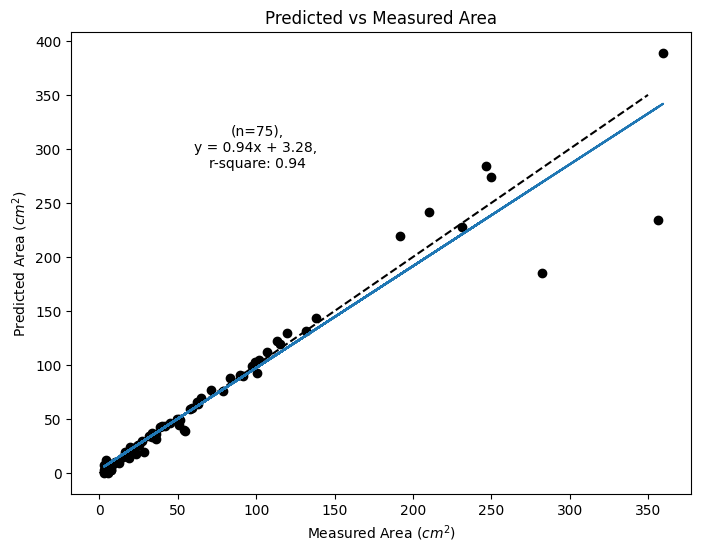

In [219]:
# set the size of the plot
plt.figure(figsize=(8, 6))
plt.xlabel('Measured Area $\\left( cm^2 \\right)$')
plt.ylabel('Predicted Area $\\left( cm^2 \\right)$')
plt.title('Predicted vs Measured Area')


plt.plot(data['imagej_area'], data['area'], 'o', color='black') # plot the data
plt.plot([0,50,100,150,200,250,300,350], [0,50,100,150,200,250,300,350], 'k--')
#plt.plot(data_60['imagej_area'], poly_line_60(data_60['imagej_area']), color='red')
#plt.plot(data_80['imagej_area'], poly_line_80(data_80['imagej_area']), color='green')
#plt.plot(data_100['imagej_area'], poly_line_100(data_100['imagej_area']), color='blue')
plt.plot(data['imagej_area'], poly_line(data['imagej_area']))


'''
# Add equation of the line to the plot
equation = f"y = {coefficients_60[0]:.2f}x + {coefficients_60[1]:.2f}"
r2 = metrics.r2_score(data_60['area'], poly_line_60(data_60['imagej_area']))
text_60 = f"60cm (n={len(data_60)}) : {equation}, R2: {r2:.2f}"
plt.text(0.3, 0.95, text_60, ha='center', va='center', transform=plt.gca().transAxes, color='red')

# Add equation of the line to the plot
equation = f"y = {coefficients_80[0]:.2f}x + {coefficients_80[1]:.2f}"
r2 = metrics.r2_score(data_80['area'], poly_line_80(data_80['imagej_area']))
text_80 = f"80cm (n={len(data_80)}) : {equation}, R2: {r2:.2f}"
plt.text(0.3, 0.85, text_80, ha='center', va='center', transform=plt.gca().transAxes, color='green')

# Add equation of the line to the plot
equation = f"y = {coefficients_100[0]:.2f}x + {coefficients_100[1]:.2f}"
r2 = metrics.r2_score(data_100['area'], poly_line_100(data_100['imagej_area']))
text_100 = f"100cm (n={len(data_100)}) : {equation}, R2: {r2:.2f}"
plt.text(0.3, 0.75, text_100, ha='center', va='center', transform=plt.gca().transAxes, color='blue')
'''

# Add equation of the line to the plot
equation = f"y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}"
r2 = metrics.r2_score(data['area'], poly_line(data['imagej_area']))
text_all = f"(n={len(data)}),\n{equation}, \nr-square: {r2:.2f}"
plt.text(0.3, 0.75, text_all, ha='center', va='center', transform=plt.gca().transAxes, color='black')


In [220]:
######### further evaluation #########

In [221]:
# absolute difference
data['abs_diff'] = abs(data['imagej_area'] - data['area'])
data['diff'] = data['imagej_area'] - data['area']

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_65656/2060323613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['abs_diff'] = abs(data['imagej_area'] - data['area'])


In [222]:
# categorize data by flwoer color
data[["flower_color", "imagej_area", "area", "abs_diff", "diff"]].groupby("flower_color").count() 
# you can use count, mean, sum, etc.

,imagej_area,area,abs_diff,diff
flower_color,,,,
T1,18,18,18,18
T2,15,15,15,15
T3,21,21,21,21
T4,17,17,17,17
T5,4,4,4,4


In [223]:
# filter data by flower color
data_t1 = data.query('flower_color == "T1"')
data_t2 = data.query('flower_color == "T2"')
data_t3 = data.query('flower_color == "T3"')
data_t4 = data.query('flower_color == "T4"')
data_t5 = data.query('flower_color == "T5"')

([<matplotlib.axis.XTick at 0x1769bf2b0>,
 [Text(0, 0, 'T1(n=18)'),
  Text(1, 0, 'T2(n=15)'),
  Text(2, 0, 'T3(n=21)'),
  Text(3, 0, 'T4(n=17)'),
  Text(4, 0, 'T5(n=4)')])

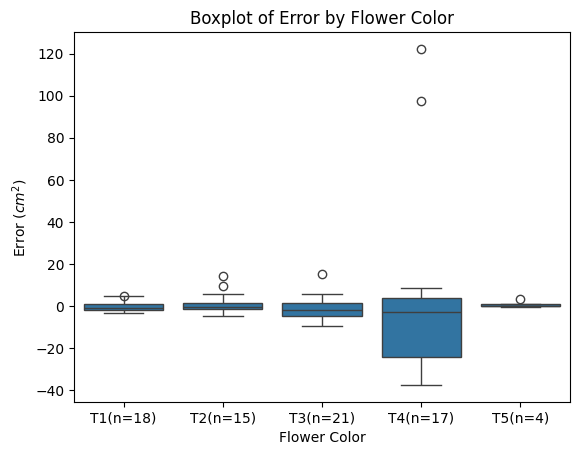

In [224]:
sns.boxplot(x='flower_color', y='diff', data=data, order=['T1', 'T2', 'T3', 'T4', 'T5'])
plt.title('Boxplot of Error by Flower Color')
plt.xlabel('Flower Color')
plt.ylabel('Error $\\left( cm^2 \\right)$')
plt.xticks([0,1,2,3,4], [f'T1(n={len(data_t1)})', f'T2(n={len(data_t2)})', f'T3(n={len(data_t3)})', f'T4(n={len(data_t4)})', f'T5(n={len(data_t5)})'])

In [225]:
#https://www.statology.org/null-hypothesis-for-anova/

# Read about anova testing above

# Perform ANOVA test
result = stats.f_oneway(data[data['flower_color'] == 'T1']['diff'],
                        data[data['flower_color'] == 'T2']['diff'],
                        data[data['flower_color'] == 'T3']['diff'],
                        data[data['flower_color'] == 'T4']['diff'],
                        data[data['flower_color'] == 'T5']['diff'])

# Print the ANOVA test result
print("ANOVA Test Result:")
print("F-value:", result.statistic)
print("p-value:", result.pvalue)

ANOVA Test Result:
F-value: 0.15353498510562122
p-value: 0.9608008659982746


The p-value is greather than 0.05, hence we fail to reject the null hypothesis and such we can conclude that there isn't evidence in the data that color has significatn effect.

In [226]:
## categorize by distance

In [227]:
data[["distance", "imagej_area", "area", "abs_diff", "diff"]].groupby("distance").count()

,imagej_area,area,abs_diff,diff
distance,,,,
100cm,27,27,27,27
60cm,22,22,22,22
80cm,23,23,23,23
90cm,3,3,3,3


In [228]:
# filter data for distance anlysis
data_60 = data.query('distance == "60cm"')
data_80 = data.query('distance == "80cm"')
data_100 = data.query('distance == "100cm"')

([<matplotlib.axis.XTick at 0x176a6de50>,
 [Text(0, 0, '60cm (n=22)'),
  Text(1, 0, '80cm (n=23)'),
  Text(2, 0, '100cm (n=27)')])

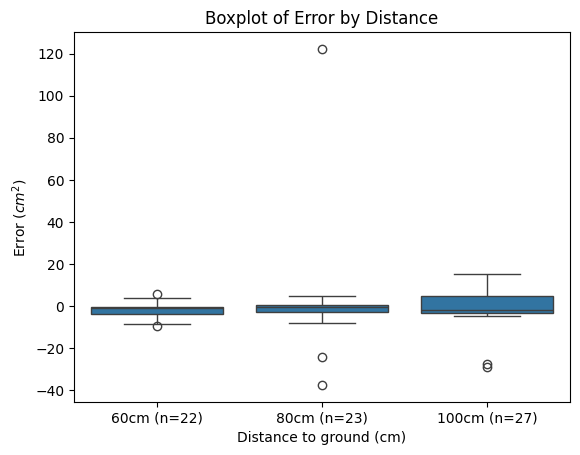

In [229]:
sns.boxplot(x='distance', y='diff', data=data, order=['60cm', '80cm', '100cm'])
plt.title('Boxplot of Error by Distance')
plt.xlabel('Distance to ground (cm)')
plt.ylabel('Error $\\left( cm^2 \\right)$')
plt.xticks([0,1,2], [f'60cm (n={len(data_60)})', f'80cm (n={len(data_80)})', f'100cm (n={len(data_100)})'])

In [230]:
#https://www.statology.org/null-hypothesis-for-anova/

# Read about anova testing above

# Perform ANOVA test
result = stats.f_oneway(data_60["diff"], data_80["diff"], data_100["diff"])

# Print the ANOVA test result
print("ANOVA Test Result:")
print("F-value:", result.statistic)
print("p-value:", result.pvalue)

ANOVA Test Result:
F-value: 0.2685369058795013
p-value: 0.7652924771763612


In [231]:
# fail to reject the null hypothesis

In [232]:
### categorize by morphology

In [233]:
data[["morphology", "imagej_area", "area", "abs_diff", "diff"]].groupby("morphology").count()

,imagej_area,area,abs_diff,diff
morphology,,,,
C1,18,18,18,18
C2,36,36,36,36
C3,21,21,21,21


In [234]:
# filter data for morphology analysis
data_c1 = data.query('morphology == "C1"')
data_c2 = data.query('morphology == "C2"')
data_c3 = data.query('morphology == "C3"')

([<matplotlib.axis.XTick at 0x176b1de80>,
 [Text(0, 0, 'C1 (n=18)'), Text(1, 0, 'C2 (n=36)'), Text(2, 0, 'C3 (n=21)')])

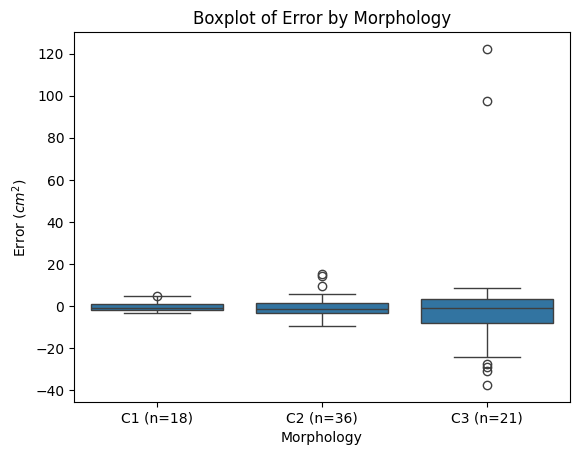

In [235]:
sns.boxplot(x='morphology', y='diff', data=data, order=['C1', 'C2', 'C3'])
plt.title('Boxplot of Error by Morphology')
plt.xlabel('Morphology')
plt.ylabel('Error $\\left( cm^2 \\right)$')
plt.xticks([0,1,2], [f'C1 (n={len(data_c1)})', f'C2 (n={len(data_c2)})', f'C3 (n={len(data_c3)})'])

In [236]:
#https://www.statology.org/null-hypothesis-for-anova/

# Read about anova testing above

# Perform ANOVA test
result = stats.f_oneway(data_c1["diff"], data_c2["diff"], data_c3["diff"])

# Print the ANOVA test result
print("ANOVA Test Result:")
print("F-value:", result.statistic)
print("p-value:", result.pvalue)

ANOVA Test Result:
F-value: 0.22739575485621413
p-value: 0.7971753700541301


In [237]:
############## Check assumptions for ANOVA ##############
# 

In [238]:
#plt.hist(data['diff'], bins=20)

In [239]:
#plt.hist(data_c1['diff'])

In [240]:
#plt.hist(data_c2['diff'])

In [241]:
#plt.hist(data_c3['diff'])

In [242]:
#plt.hist(data_60['diff'])

In [243]:
#plt.hist(data_80['diff'])

In [244]:
#plt.hist(data_100['diff'])

In [245]:
#plt.hist(data_t1['diff'])

In [246]:
#plt.hist(data_t2['diff'])

In [247]:
#plt.hist(data_t3['diff'])

In [248]:
#plt.hist(data_t4['diff'])

In [249]:
#plt.hist(data_t5['diff'])

In [250]:
########### further further evaluation ###########

# check if there is any statistical difference between the predicted floral area by distance (60cm, 80cm, 100cm)

In [251]:
# remove flowers that does not have measurements in 60, 80, and 100 cm
data1= data[data['flower_number'] != 'F23']
data1 = data1[data1['distance'] != '90cm']
data1.head()

,area,flower_number,distance,imagej_area,flower_color,morphology,abs_diff,diff
0,49.604561,F6,80cm,51.309575,T1,C1,1.705014,1.705014
1,3.518554,F11,80cm,3.367735,T5,C3,0.150819,-0.150819
3,24.514801,F21,100cm,19.696735,T2,C2,4.818066,-4.818066
4,131.486662,F13,80cm,131.586834,T4,C3,0.100172,0.100172
5,21.891804,F21,80cm,20.451572,T2,C2,1.440232,-1.440232


<Axes: ylabel='diff'>

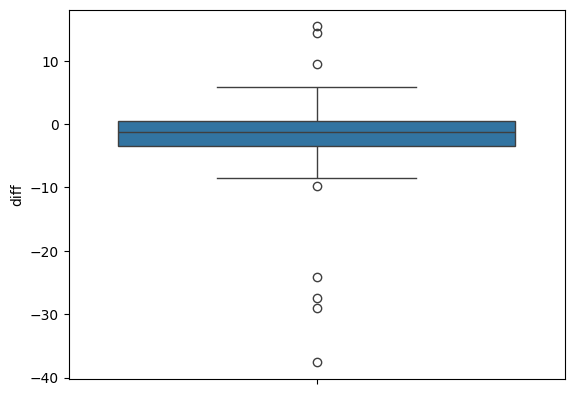

In [252]:
# detect and remove outliers
from scipy import stats
# Calculate z-scores for the 'diff' column
z_scores = stats.zscore(data1['diff'])

# Define a threshold for outlier detection
threshold = 3

# Filter out the outliers
data2 = data1[(z_scores < threshold)]

# Plot the boxplot without outliers
sns.boxplot(y='diff', data=data2)


In [253]:
# 
data3 = data2.query('distance == "80cm"')[["flower_number","area","imagej_area"]]

In [254]:
flower_numbers = data3["flower_number"].unique().tolist()
#flower_numbers

In [255]:
flower_dicts = {}
for flower in flower_numbers:
    flower_temp = flower
    flower_dicts[flower] = np.mean(data3.query(f'flower_number == "{flower_temp}"')["imagej_area"].tolist())

#flower_temp = flower_numbers[0]
#fa = np.mean(data2.query(f'flower_number == "{flower_temp}"')["imagej_area"].tolist())

In [256]:
flower_dicts

{'F6': 51.3095748,
 'F11': 3.3677352000000003,
 'F13': 131.5868336,
 'F21': 20.451572,
 'F19': 33.2192884,
 'F10': 19.3031872,
 'F22': 21.4773764,
 'F7': 96.8127096,
 'F2': 45.148296800000004,
 'F18': 31.393485599999998,
 'F8': 7.677403999999999,
 'F14': 248.15434240000002,
 'F12': 3.903218,
 'F17': 15.258034000000002,
 'F20': 115.1417052,
 'F3': 7.8515972000000005,
 'F9': 59.090204400000005,
 'F1': 38.6708904,
 'F16': 62.5611652,
 'F5': 18.845123599999997}

In [257]:
def getDiff(flower_area, flower_number):
    try:
        return flower_area - flower_dicts[flower_number]
    except:
        return "unknown"

In [258]:
data2['flower_diff'] = data2.apply(lambda x: getDiff(x['area'], x['flower_number']), axis=1)

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_65656/3489814563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['flower_diff'] = data2.apply(lambda x: getDiff(x['area'], x['flower_number']), axis=1)


In [259]:
data2[data2["flower_diff"] != 0]

,area,flower_number,distance,imagej_area,flower_color,morphology,abs_diff,diff,flower_diff
0,49.604561,F6,80cm,51.309575,T1,C1,1.705014,1.705014,-1.705014
1,3.518554,F11,80cm,3.367735,T5,C3,0.150819,-0.150819,0.150819
3,24.514801,F21,100cm,19.696735,T2,C2,4.818066,-4.818066,4.063229
4,131.486662,F13,80cm,131.586834,T4,C3,0.100172,0.100172,-0.100172
5,21.891804,F21,80cm,20.451572,T2,C2,1.440232,-1.440232,1.440232
...,...,...,...,...,...,...,...,...,...
70,17.735496,F5,80cm,18.845124,T1,C1,1.109628,1.109628,-1.109628
71,4.070898,F11,60cm,3.535477,T5,C3,0.535421,-0.535421,0.703163
72,39.206340,F16,100cm,54.606342,T3,C2,15.400002,15.400002,-23.354825
73,43.821045,F6,100cm,41.935400,T1,C1,1.885645,-1.885645,-7.48853


In [260]:
# filter out 80cm, which is the middle measurement or reference and unknonw, which are for the flowers without 80cm measurement
data4 = data2.query(' distance != "80cm" and flower_diff != "unknown" ')

(array([ 3.,  0.,  2.,  7., 12., 10.,  4.,  1.,  2.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-29.17913421, -22.9119445 , -16.64475479, -10.37756508,
         -4.11037537,   2.15681434,   8.42400404,  14.69119375,
         20.95838346,  27.22557317,  33.49276288,  39.75995259,
         46.0271423 ,  52.29433201,  58.56152172,  64.82871143,
         71.09590113,  77.36309084,  83.63028055,  89.89747026,
         96.16465997]),
 <BarContainer object of 20 artists>)

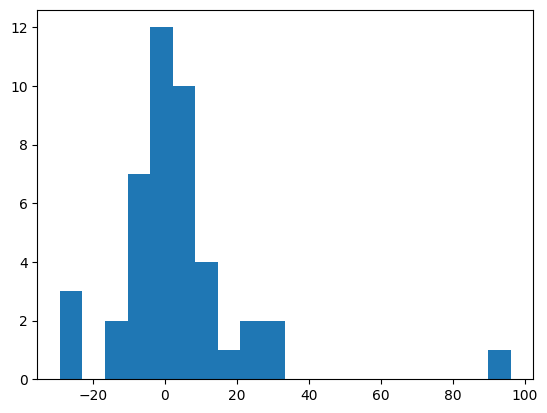

In [261]:
# histogram of distance effect on the same plant
plt.hist(data4["flower_diff"], bins=20)

Text(0.5, 1.0, 'Effect of Distance on Floral Area Estimate (n=44)')

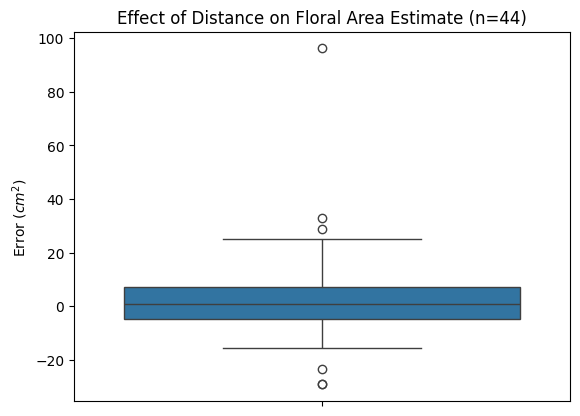

In [262]:
# box plot showing the 
sns.boxplot(data4['flower_diff'])
plt.ylabel("Error $\\left( cm^2 \\right)$")
plt.title(f"Effect of Distance on Floral Area Estimate (n={len(data4)})")

In [263]:
#https://www.statology.org/one-sample-t-test/
#one sample t-test
from scipy import stats
# statistcal test that the mean is 0

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(data4['flower_diff'].tolist(), 0)

# Print the t-test result
print("T-Test Result:")
print("T-statistic:", t_statistic)
print("p-value:", p_value)


T-Test Result:
T-statistic: 1.0907456030196894
p-value: 0.28145934582466947


In [264]:
# we fail to reject the null hypothesis, which means that the difference in the predicted floral area is not significantly different from 0

In [265]:
############## Experiment 2 Evaluation ##############

In [266]:
df2 = pd.read_csv('floralarea_2_.csv')

In [267]:
df3 = pd.read_csv('/Users/edwardamoah/Documents/GitHub/FloralArea/research/floralarea_experiment_2_3.csv')

In [268]:
df2.head()

,images,flower_number,imagej_area,flower_color,morphology
0,PXL_20240612_200614241.tif,F1,13.242,Pink,C3
1,PXL_20240612_200707249.tif,F2,51.383,"White,Yellow,Red",C2
2,PXL_20240612_201017550.tif,F3,10.950,"White,Yellow,Red",C2
3,PXL_20240612_201113770.tif,F4,19.372,"White,Yellow,Red",C2
4,PXL_20240612_201201358.tif,F5,114.592,"White,Red,Purple",C2


In [269]:
df3.head()

,area,mask,images
0,137.597817,api/data/output/flower_0.4_2197274d-6546-46f7-...,PXL_20240612_201201358.jpg
1,38.591344,api/data/output/flower_0.4_9b84a729-23d8-4352-...,PXL_20240612_202057540.jpg
2,104.141231,api/data/output/flower_0.4_757c6ee2-da3b-40ab-...,PXL_20240612_202614032.jpg
3,10.558077,api/data/output/flower_0.4_103803f2-ad17-492e-...,PXL_20240612_201017550.jpg
4,10.532258,api/data/output/flower_0.4_1fc6c0ef-4433-4c69-...,PXL_20240612_203143722.jpg


In [270]:
def getFileName(file):
    return file.split('/')[-1].split('.')[0]

In [271]:
# file 
df2['file'] = df2.apply(lambda x: getFileName(x['images']), axis=1)

df3['file'] = df3.apply(lambda x: getFileName(x['images']), axis=1)

In [272]:
# merge data
df4 = df3.merge(df2, on='file', how='inner')

In [273]:
df4['area'] = df4['area'].apply(convert_inch_to_cm)
df4['imagej_area'] = df4['imagej_area'].apply(convert_inch_to_cm)

Text(0.3, 0.75, '(n=32),\ny = 1.01x + 11.55, \nr-square: 0.98')

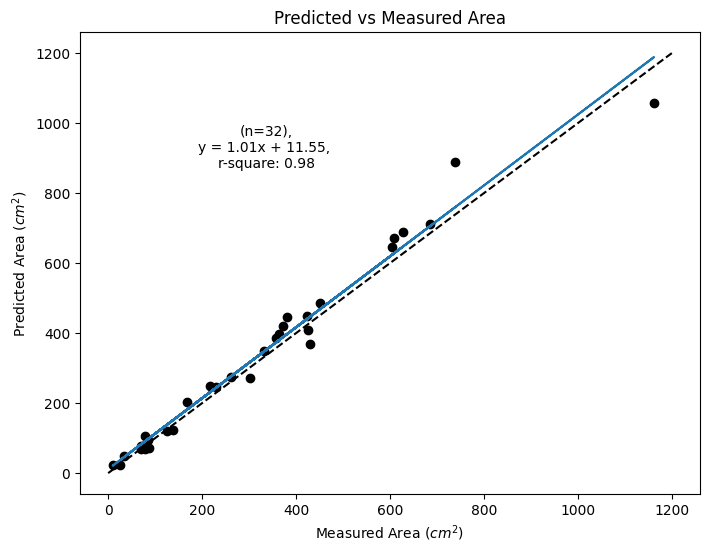

In [274]:
# make plot

data = df4

# Fit a polynomial regression line
coefficients = np.polyfit(data['imagej_area'], data['area'], 1)
poly_line = np.poly1d(coefficients)

# set the size of the plot
plt.figure(figsize=(8, 6))
plt.xlabel('Measured Area $\\left( cm^2 \\right)$')
plt.ylabel('Predicted Area $\\left( cm^2 \\right)$')
plt.title('Predicted vs Measured Area')


plt.plot(data['imagej_area'], data['area'], 'o', color='black') # plot the data
plt.plot([0,200,400,600,800,1000,1200], [0,200,400,600,800,1000,1200], 'k--')
plt.plot(data['imagej_area'], poly_line(data['imagej_area']))


# Add equation of the line to the plot
equation = f"y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}"
r2 = metrics.r2_score(data['area'], poly_line(data['imagej_area']))
text_all = f"(n={len(data)}),\n{equation}, \nr-square: {r2:.2f}"
plt.text(0.3, 0.75, text_all, ha='center', va='center', transform=plt.gca().transAxes, color='black')

Text(0.3, 0.75, '(n=32),\ny = 1.01x + 11.55, \nr-square: 0.98')

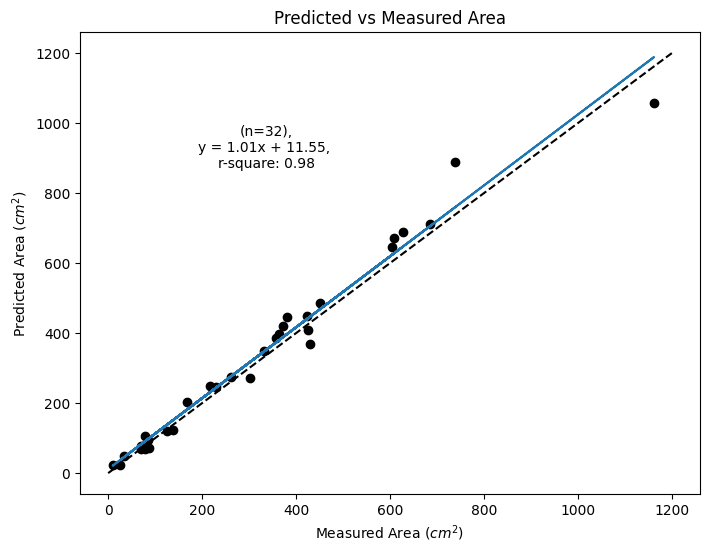

In [22]:
# make plot

data = df4

# Fit a polynomial regression line
coefficients = np.polyfit(data['imagej_area'], data['area'], 1)
poly_line = np.poly1d(coefficients)

# set the size of the plot
plt.figure(figsize=(8, 6))
plt.xlabel('Measured Area $\\left( cm^2 \\right)$')
plt.ylabel('Predicted Area $\\left( cm^2 \\right)$')
plt.title('Predicted vs Measured Area')


plt.plot(data['imagej_area'], data['area'], 'o', color='black') # plot the data
plt.plot([0,200,400,600,800,1000,1200], [0,200,400,600,800,1000,1200], 'k--')
plt.plot(data['imagej_area'], poly_line(data['imagej_area']))


# Add equation of the line to the plot
equation = f"y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}"
r2 = metrics.r2_score(data['area'], poly_line(data['imagej_area']))
text_all = f"(n={len(data)}),\n{equation}, \nr-square: {r2:.2f}"
plt.text(0.3, 0.75, text_all, ha='center', va='center', transform=plt.gca().transAxes, color='black')